In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Conv1D, Conv2D, Dense, Dropout, MaxPooling1D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam, Nadam, Adagrad, SGD, RMSprop
# from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [103]:
df = pd.read_csv("sensor-nodes.csv")
df.head(10)


,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious
0,1,01-02-2023 00:00,192.168.119.138,52.018229,2.727317,0.955687,130.967180,-52.059232,23.974265,82.982598,...,3,11.323044,11.458199,20.670539,14.385439,0.109146,26.376693,29.186341,76.811986,0
1,2,01-02-2023 00:01,192.168.225.56,59.504648,1.435058,1.228460,82.634358,-57.754723,22.572052,66.734853,...,6,8.277362,8.832980,15.555122,14.316681,0.077136,34.963429,34.203177,112.495912,0
2,3,01-02-2023 00:02,192.168.187.210,34.118204,1.320905,1.015245,61.649928,-52.399037,15.667076,74.593605,...,5,8.196374,8.330227,19.470748,11.792084,0.052993,48.934585,31.682662,117.526109,0
3,4,01-02-2023 00:03,192.168.78.245,39.643055,1.988791,0.784562,69.704181,-53.727443,20.286962,76.710564,...,6,10.683766,6.525032,16.228955,8.895409,0.087810,47.045600,37.470027,123.058913,0
4,5,01-02-2023 00:04,192.168.233.229,40.212679,1.005121,1.412193,123.445612,-49.696620,24.318538,84.477890,...,7,11.176823,10.617432,12.257423,10.168739,0.068823,33.394354,26.582970,71.696911,0
5,6,01-02-2023 00:05,192.168.230.20,42.539308,1.777329,1.226797,140.306629,-48.164891,22.562783,80.792853,...,3,9.100424,10.912167,17.039896,17.098904,0.095630,41.592922,37.011924,135.173141,0
6,7,01-02-2023 00:06,192.168.201.178,34.371305,2.122728,1.238309,82.759149,-46.749541,22.199859,83.896476,...,5,5.514884,9.764031,14.729525,14.537270,0.112991,51.911647,33.413317,113.722314,0
7,8,01-02-2023 00:07,192.168.0.73,39.421713,1.632756,1.070672,128.744279,-47.965449,22.017101,73.018853,...,3,8.785059,7.424502,14.028956,16.584326,0.150733,43.373535,32.514071,101.301618,0
8,9,01-02-2023 00:08,192.168.35.14,64.392638,1.771348,0.614431,105.554913,-45.030005,19.406187,100.505321,...,4,9.652375,9.578266,20.649000,13.220874,0.133769,41.662683,36.024818,130.214575,0
9,10,01-02-2023 00:09,192.168.94.186,71.586404,2.874885,1.175556,109.901877,-43.949902,27.354364,76.642262,...,3,8.413089,14.570255,15.308871,14.962364,0.088105,39.467362,31.086755,130.360976,0


In [104]:
X = df.drop(columns=['Node_ID', 'Timestamp', 'IP_Address', 'Is_Malicious'])
y = df['Is_Malicious']


In [105]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [106]:
# LSTM
X_train_val_lstm, X_test_lstm, y_train_val_lstm, y_test_lstm = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

X_train_lstm, X_val_lstm, y_train_lstm, y_val_lstm = train_test_split(
    X_train_val_lstm, y_train_val_lstm, test_size=0.25, random_state=42)

print("Shape of X_train:", X_train_lstm.shape)
print("Shape of X_val:", X_val_lstm.shape)
print("Shape of X_test:", X_test_lstm.shape)
print("Shape of y_train:", y_train_lstm.shape)
print("Shape of y_val:", y_val_lstm.shape)
print("Shape of y_test:", y_test_lstm.shape)


Shape of X_train: (6000, 17)
Shape of X_val: (2000, 17)
Shape of X_test: (2000, 17)
Shape of y_train: (6000,)
Shape of y_val: (2000,)
Shape of y_test: (2000,)


In [107]:
sequence_length = X_train_lstm.shape[1]
num_features = 1

X_train_reshaped_lstm = np.expand_dims(X_train_lstm, axis=-1)
X_val_reshaped_lstm = np.expand_dims(X_val_lstm, axis=-1)
X_test_reshaped_lstm = np.expand_dims(X_test_lstm, axis=-1)
# X_train_reshaped_lstm = X_train_lstm.reshape(
#     X_train_lstm.shape[0], X_train_lstm.shape[1])
# X_val_reshaped_lstm = X_val_lstm.reshape(
#     X_val_lstm.shape[0], X_val_lstm.shape[1])
# X_test_reshaped_lstm = X_test_lstm.reshape(
#     X_test_lstm.shape[0], X_test_lstm.shape[1])

print("Sequence length: ", sequence_length)
print("Num of features: ", num_features)


Sequence length:  17
Num of features:  1


In [108]:
lstm_model = Sequential()
lstm_model.add(LSTM(32, input_shape=(sequence_length, num_features),
               kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
lstm_model.add(Dense(16, activation='relu'))
lstm_model.add(Dropout(0.5))


In [109]:
# Adam Optimizer
lstm_adam_optimizer = Adam(learning_rate=0.001)

lstm_model.compile(optimizer=lstm_adam_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])

lstm_adam_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
                                   epochs=100, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/100
188/188 [==============================] - 3s 6ms/step - loss: 0.4805 - accuracy: 0.5587 - val_loss: 0.1298 - val_accuracy: 0.8550
Epoch 2/100
188/188 [==============================] - 1s 5ms/step - loss: 0.4158 - accuracy: 0.9180 - val_loss: 0.0727 - val_accuracy: 0.9175
Epoch 3/100
188/188 [==============================] - 1s 5ms/step - loss: 0.4067 - accuracy: 0.9372 - val_loss: 0.0673 - val_accuracy: 0.9390
Epoch 4/100
188/188 [==============================] - 1s 6ms/step - loss: 0.4165 - accuracy: 0.9403 - val_loss: 0.0592 - val_accuracy: 0.9325
Epoch 5/100
188/188 [==============================] - 1s 7ms/step - loss: 0.4185 - accuracy: 0.9388 - val_loss: 0.0576 - val_accuracy: 0.9410
Epoch 6/100
188/188 [==============================] - 1s 5ms/step - loss: 0.4054 - accuracy: 0.9435 - val_loss: 0.0544 - val_accuracy: 0.9340
Epoch 7/100
188/188 [==============================] - 1s 6ms/step - loss: 0.4225 - accuracy: 0.9435 - val_loss: 0.0537 - val_accuracy: 0.9410

In [110]:
lstm_nadam_optimizer = Nadam(learning_rate=0.001)
lstm_model.compile(optimizer=lstm_nadam_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])
lstm_nadam_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
                                    epochs=100, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/100
188/188 [==============================] - 3s 7ms/step - loss: 0.3921 - accuracy: 0.9502 - val_loss: 0.0016 - val_accuracy: 0.9545
Epoch 2/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3820 - accuracy: 0.9505 - val_loss: 0.0018 - val_accuracy: 0.9545
Epoch 3/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3761 - accuracy: 0.9513 - val_loss: 0.0012 - val_accuracy: 0.9545
Epoch 4/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3855 - accuracy: 0.9507 - val_loss: 9.0197e-04 - val_accuracy: 0.9540
Epoch 5/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3868 - accuracy: 0.9497 - val_loss: 0.0023 - val_accuracy: 0.9520
Epoch 6/100
188/188 [==============================] - 1s 6ms/step - loss: 0.3875 - accuracy: 0.9467 - val_loss: 0.0046 - val_accuracy: 0.9545
Epoch 7/100
188/188 [==============================] - 1s 6ms/step - loss: 0.3768 - accuracy: 0.9502 - val_loss: 0.0018 - val_accuracy: 0.

In [111]:
lstm_adagrad_optimizer = Adagrad(learning_rate=0.001)
lstm_model.compile(optimizer=lstm_adagrad_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])
lstm_adagrad_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
                                      epochs=100, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/100
188/188 [==============================] - 3s 9ms/step - loss: 0.3837 - accuracy: 0.9497 - val_loss: 0.0010 - val_accuracy: 0.9525
Epoch 2/100
188/188 [==============================] - 1s 6ms/step - loss: 0.3814 - accuracy: 0.9503 - val_loss: 0.0012 - val_accuracy: 0.9530
Epoch 3/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3880 - accuracy: 0.9505 - val_loss: 0.0013 - val_accuracy: 0.9535
Epoch 4/100
188/188 [==============================] - 1s 7ms/step - loss: 0.3833 - accuracy: 0.9505 - val_loss: 0.0014 - val_accuracy: 0.9535
Epoch 5/100
188/188 [==============================] - 1s 6ms/step - loss: 0.3709 - accuracy: 0.9505 - val_loss: 0.0015 - val_accuracy: 0.9535
Epoch 6/100
188/188 [==============================] - 1s 7ms/step - loss: 0.3828 - accuracy: 0.9505 - val_loss: 0.0015 - val_accuracy: 0.9535
Epoch 7/100
188/188 [==============================] - 1s 6ms/step - loss: 0.3724 - accuracy: 0.9505 - val_loss: 0.0016 - val_accuracy: 0.9535

In [112]:
lstm_sgd_optimizer = SGD(learning_rate=0.001)

lstm_model.compile(optimizer=lstm_sgd_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])

lstm_sgd_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm, epochs=100,
                                  batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/100
188/188 [==============================] - 3s 7ms/step - loss: 0.3775 - accuracy: 0.9507 - val_loss: 0.0017 - val_accuracy: 0.9540
Epoch 2/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3791 - accuracy: 0.9507 - val_loss: 0.0018 - val_accuracy: 0.9540
Epoch 3/100
188/188 [==============================] - 1s 7ms/step - loss: 0.3828 - accuracy: 0.9507 - val_loss: 0.0017 - val_accuracy: 0.9540
Epoch 4/100
188/188 [==============================] - 1s 7ms/step - loss: 0.3850 - accuracy: 0.9507 - val_loss: 0.0017 - val_accuracy: 0.9540
Epoch 5/100
188/188 [==============================] - 1s 6ms/step - loss: 0.3810 - accuracy: 0.9507 - val_loss: 0.0018 - val_accuracy: 0.9540
Epoch 6/100
188/188 [==============================] - 1s 6ms/step - loss: 0.3799 - accuracy: 0.9507 - val_loss: 0.0018 - val_accuracy: 0.9540
Epoch 7/100
188/188 [==============================] - 1s 6ms/step - loss: 0.3961 - accuracy: 0.9508 - val_loss: 0.0018 - val_accuracy: 0.9540

In [113]:
lstm_rms_optimizer = RMSprop(learning_rate=0.001)

lstm_model.compile(optimizer=lstm_rms_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])

lstm_rms_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm, epochs=100,
                                  batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/100
188/188 [==============================] - 3s 6ms/step - loss: 0.3699 - accuracy: 0.9507 - val_loss: 0.0025 - val_accuracy: 0.9540
Epoch 2/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3870 - accuracy: 0.9502 - val_loss: 0.0074 - val_accuracy: 0.9545
Epoch 3/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3738 - accuracy: 0.9500 - val_loss: 0.0042 - val_accuracy: 0.9540
Epoch 4/100
188/188 [==============================] - 1s 6ms/step - loss: 0.3711 - accuracy: 0.9502 - val_loss: 0.0063 - val_accuracy: 0.9545
Epoch 5/100
188/188 [==============================] - 1s 7ms/step - loss: 0.3907 - accuracy: 0.9503 - val_loss: 0.0023 - val_accuracy: 0.9540
Epoch 6/100
188/188 [==============================] - 1s 6ms/step - loss: 0.3812 - accuracy: 0.9502 - val_loss: 0.0024 - val_accuracy: 0.9540
Epoch 7/100
188/188 [==============================] - 1s 7ms/step - loss: 0.3893 - accuracy: 0.9500 - val_loss: 0.0020 - val_accuracy: 0.9540

In [114]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(
    X_test_reshaped_lstm, y_test_lstm)
print("Test LSTM Loss: ", lstm_loss)
print("Test LSTM Accuracy: ", lstm_accuracy)


63/63 [==============================] - 0s 2ms/step - loss: 4.7663e-04 - accuracy: 0.9475
Test LSTM Loss:  0.00047663378063589334
Test LSTM Accuracy:  0.9474999904632568


In [115]:
lstm_train_probs = lstm_model.predict(X_train_reshaped_lstm, verbose=0)
lstm_train_classes = (lstm_train_probs > 0.5).astype("int32")

lstm_train_probs = lstm_train_probs[:, 0]
lstm_train_classes = lstm_train_classes[:, 0]

lstm_train_accuracy = accuracy_score(y_train_lstm, lstm_train_classes)
print("Accuracy: ", lstm_train_accuracy)

lstm_train_precision = precision_score(y_train_lstm, lstm_train_classes)
print("Precision: ", lstm_train_precision)

lstm_train_recall = recall_score(y_train_lstm, lstm_train_classes)
print("Recall: ", lstm_train_recall)

train_f1_score_value_lstm = f1_score(y_train_lstm, lstm_train_classes)
print("F1 score: ", train_f1_score_value_lstm)


Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 score:  1.0


In [116]:
lstm_probs = lstm_model.predict(X_test_reshaped_lstm, verbose=0)
lstm_classes = (lstm_model.predict(
    X_test_reshaped_lstm, verbose=0) > 0.5).astype("int32")

lstm_probs = lstm_probs[:, 0]
lstm_classes = lstm_classes[:, 0]

lstm_accuracy = accuracy_score(y_test_lstm, lstm_classes)
print("Accuracy: ", lstm_accuracy)

lstm_precision = precision_score(y_test_lstm, lstm_classes)
print("Precision: ", lstm_precision)

lstm_recall = recall_score(y_test_lstm, lstm_classes)
print("Recall: ", lstm_recall)

f1_score_value_lstm = f1_score(y_test_lstm, lstm_classes)
print("F1 score: ", f1_score_value_lstm)


Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 score:  1.0


In [117]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']


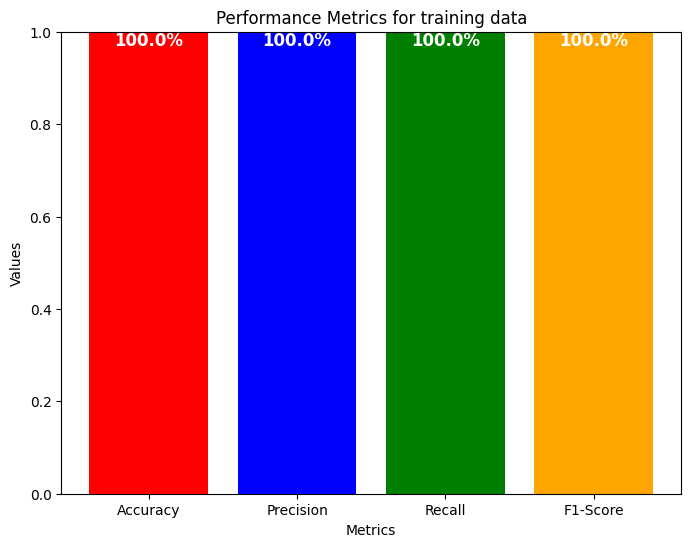

In [118]:
lstm_train_values = [lstm_train_accuracy, lstm_train_precision,
                     lstm_train_recall, train_f1_score_value_lstm]

plt.figure(figsize=(8, 6))
lstm_train_matrix_bars = plt.bar(metrics, lstm_train_values, color=['red',
                                                                    'blue', 'green', 'orange'])
for bar in lstm_train_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for training data')
plt.ylim([0, 1])
plt.show()


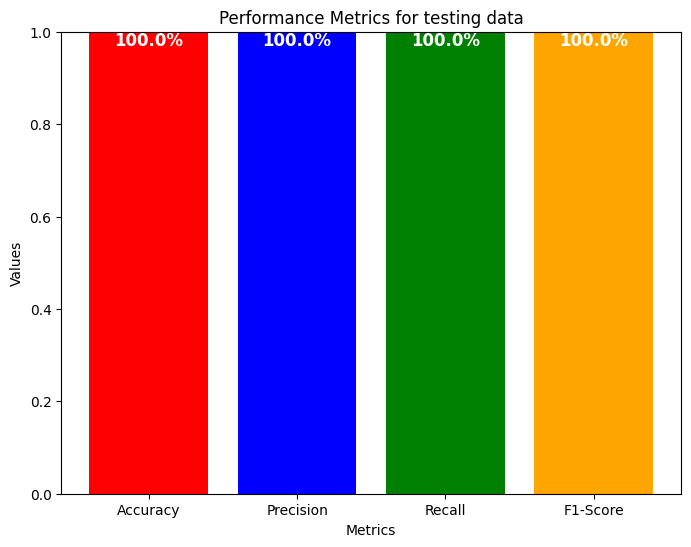

In [119]:
lstm_values = [lstm_accuracy, lstm_precision, lstm_recall, f1_score_value_lstm]

plt.figure(figsize=(8, 6))
lstm_matrix_bars = plt.bar(metrics, lstm_values, color=['red',
                           'blue', 'green', 'orange'])
for bar in lstm_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for testing data')
plt.ylim([0, 1])
plt.show()


In [120]:
# GRU
X_train_gru, X_temp_gru, y_train_gru, y_temp_gru = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

X_val_gru, X_test_gru, y_val_gru, y_test_gru = train_test_split(
    X_temp_gru, y_temp_gru, test_size=0.5, random_state=42)

X_train_reshaped_gru = X_train_gru.reshape(-1, 1, X_train_gru.shape[1])
X_val_reshaped_gru = X_val_gru.reshape(-1, 1, X_val_gru.shape[1])
X_test_reshaped_gru = X_test_gru.reshape(-1, 1, X_test_gru.shape[1])


In [121]:
gru_model = Sequential()
gru_model.add(GRU(32, input_shape=(
    X_train_reshaped_gru.shape[1], X_train_reshaped_gru.shape[2]), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
gru_model.add(Dense(1, activation='tanh'))
gru_model.add(Dropout(0.5))


In [122]:
gru_adam_optimizer = Adam(learning_rate=0.001)
gru_model.compile(optimizer=gru_adam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_adam_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=100,
                                 batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/100
219/219 [==============================] - 2s 3ms/step - loss: 0.5891 - accuracy: 0.9666 - val_loss: 0.1336 - val_accuracy: 0.9947
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.9754 - val_loss: 0.0935 - val_accuracy: 0.9967
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.9731 - val_loss: 0.0735 - val_accuracy: 0.9947
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4484 - accuracy: 0.9739 - val_loss: 0.0570 - val_accuracy: 0.9967
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.9744 - val_loss: 0.0430 - val_accuracy: 1.0000
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.9747 - val_loss: 0.0410 - val_accuracy: 0.9940
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4040 - accuracy: 0.9749 - val_loss: 0.0349 - val_accuracy: 0.9933

In [123]:
gru_nadam_optimizer = Nadam(learning_rate=0.001)
gru_model.compile(optimizer=gru_nadam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_nadam_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=100,
                                  batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/100
219/219 [==============================] - 2s 3ms/step - loss: 0.3887 - accuracy: 0.9747 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4214 - accuracy: 0.9727 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3928 - accuracy: 0.9746 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3950 - accuracy: 0.9744 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.9753 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 6/100
219/219 [==============================] - 1s 2ms/step - loss: 0.3619 - accuracy: 0.9766 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3576 - accuracy: 0.9769 - val_loss: 0.0077 - val_accuracy: 1.0000

In [124]:
gru_adagrad_optimizer = Adagrad(learning_rate=0.001)
gru_model.compile(optimizer=gru_adagrad_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_adagrad_history = gru_model.fit(X_train_reshaped_gru, y_train_gru,
                                    epochs=100, batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/100
219/219 [==============================] - 3s 3ms/step - loss: 0.3772 - accuracy: 0.9756 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3949 - accuracy: 0.9744 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3661 - accuracy: 0.9763 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3794 - accuracy: 0.9754 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3970 - accuracy: 0.9743 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 0.9746 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.9736 - val_loss: 0.0067 - val_accuracy: 1.0000

In [125]:
gru_sgd_optimizer = SGD(learning_rate=0.001)

gru_model.compile(optimizer=gru_sgd_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_sgd_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=100,
                                batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/100
219/219 [==============================] - 2s 3ms/step - loss: 0.3572 - accuracy: 0.9769 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3682 - accuracy: 0.9761 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4035 - accuracy: 0.9739 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.9737 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3859 - accuracy: 0.9750 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3859 - accuracy: 0.9750 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3859 - accuracy: 0.9750 - val_loss: 0.0086 - val_accuracy: 1.0000

In [126]:
gru_rms_optimizer = RMSprop(learning_rate=0.001)

gru_model.compile(optimizer=gru_rms_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_rms_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=100,
                                batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/100
219/219 [==============================] - 2s 3ms/step - loss: 0.4089 - accuracy: 0.9734 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3758 - accuracy: 0.9757 - val_loss: 0.0209 - val_accuracy: 0.9940
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.9731 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3780 - accuracy: 0.9756 - val_loss: 0.0148 - val_accuracy: 0.9993
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3868 - accuracy: 0.9750 - val_loss: 0.0159 - val_accuracy: 1.0000
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3845 - accuracy: 0.9751 - val_loss: 0.0168 - val_accuracy: 0.9987
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3670 - accuracy: 0.9761 - val_loss: 0.0112 - val_accuracy: 1.0000

In [127]:
gru_loss, gru_accuracy = gru_model.evaluate(X_test_reshaped_gru, y_test_gru)
print("Test GRU Loss: ", gru_loss)
print("Test GRU Accuracy: ", gru_accuracy)


47/47 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 0.9987
Test GRU Loss:  0.0190409068018198
Test GRU Accuracy:  0.9986666440963745


In [128]:
gru_train_probs = gru_model.predict(X_train_reshaped_gru, verbose=0)
gru_train_classes = (gru_model.predict(
    X_train_reshaped_gru, verbose=0) > 0.5).astype("int32")

# gru_train_probs = gru_train_probs[:, 0]
# gru_train_classes = gru_train_classes[:, 0]

gru_train_accuracy = accuracy_score(y_train_gru, gru_train_classes)
print("Accuracy: ", gru_train_accuracy)

gru_train_precision = precision_score(y_train_gru, gru_train_classes)
print("Precision: ", gru_train_precision)

gru_train_recall = recall_score(y_train_gru, gru_train_classes)
print("Recall: ", gru_train_recall)

train_f1_score_value_gru = f1_score(y_train_gru, gru_train_classes)
print("F1 score: ", train_f1_score_value_gru)


Accuracy:  0.9982857142857143
Precision:  1.0
Recall:  0.9658119658119658
F1 score:  0.9826086956521739


In [129]:
gru_probs = gru_model.predict(X_test_reshaped_gru, verbose=0)
gru_classes = (gru_model.predict(
    X_test_reshaped_gru, verbose=0) > 0.5).astype("int32")

gru_probs = gru_probs[:, 0]
gru_classes = gru_classes[:, 0]

gru_accuracy = accuracy_score(y_test_gru, gru_classes)
print("Accuracy: ", gru_accuracy)

gru_precision = precision_score(y_test_gru, gru_classes)
print("Precision: ", gru_precision)

gru_recall = recall_score(y_test_gru, gru_classes)
print("Recall: ", gru_recall)

f1_score_value_gru = f1_score(y_test_gru, gru_classes)
print("F1 score: ", f1_score_value_gru)


Accuracy:  0.9986666666666667
Precision:  1.0
Recall:  0.9714285714285714
F1 score:  0.9855072463768115


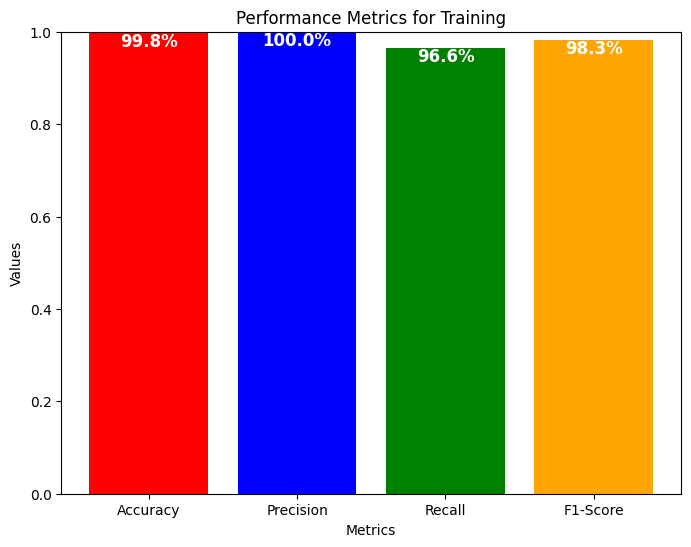

In [130]:
gru_values = [gru_train_accuracy, gru_train_precision,
              gru_train_recall, train_f1_score_value_gru]

plt.figure(figsize=(8, 6))
gru_matrix_bars = plt.bar(metrics, gru_values, color=['red',
                          'blue', 'green', 'orange'])
for bar in gru_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for Training')
plt.ylim(0, 1)
plt.show()


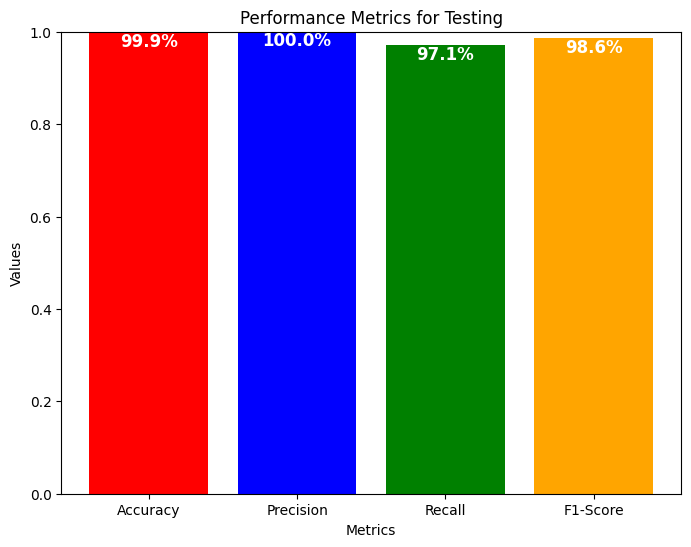

In [131]:
gru_values = [gru_accuracy, gru_precision, gru_recall, f1_score_value_gru]

plt.figure(figsize=(8, 6))
gru_matrix_bars = plt.bar(metrics, gru_values, color=['red',
                          'blue', 'green', 'orange'])
for bar in gru_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for Testing')
plt.ylim(0, 1)
plt.show()


In [132]:
# CNN
X_train_cnn, X_temp_cnn, y_train_cnn, y_temp_cnn = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

X_val_cnn, X_test_cnn, y_val_cnn, y_test_cnn = train_test_split(
    X_temp_cnn, y_temp_cnn, test_size=0.5, random_state=42)

print("Shape of X_train:", X_train_cnn.shape)

sequence_length = X_train_cnn.shape[1]
num_features = 1

X_train_reshaped_cnn = X_train_cnn.reshape(-1, sequence_length, num_features)
X_val_reshaped_cnn = X_val_cnn.reshape(-1, sequence_length, num_features)
X_test_reshaped_cnn = X_test_cnn.reshape(-1, sequence_length, num_features)


Shape of X_train: (7000, 17)


In [133]:
cnn_model = Sequential()

cnn_model.add(Conv1D(filters=16, kernel_size=3, input_shape=(
    sequence_length, num_features), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))

cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Conv1D(filters=16, kernel_size=3))

cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Flatten())

cnn_model.add(Dense(16, activation="relu"))

cnn_model.add(Dropout(0.5))


In [134]:
cnn_adam_optimizer = Adam(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_adam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_adam_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=100,
                                 batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.7006 - accuracy: 0.2367 - val_loss: 0.3812 - val_accuracy: 0.2787
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.5874 - accuracy: 0.5790 - val_loss: 0.3321 - val_accuracy: 0.5933
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.5690 - accuracy: 0.7396 - val_loss: 0.2941 - val_accuracy: 0.6927
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.5512 - accuracy: 0.8290 - val_loss: 0.2837 - val_accuracy: 0.8087
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.5433 - accuracy: 0.8317 - val_loss: 0.2795 - val_accuracy: 0.8493
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.5418 - accuracy: 0.8920 - val_loss: 0.2732 - val_accuracy: 0.8300
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.5440 - accuracy: 0.9057 - val_loss: 0.2722 - val_accuracy: 0.9020

In [135]:
cnn_nadam_optimizer = Nadam(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_nadam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_nadam_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=100,
                                  batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.4137 - accuracy: 0.9569 - val_loss: 0.0453 - val_accuracy: 0.9633
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.4085 - accuracy: 0.9513 - val_loss: 0.0432 - val_accuracy: 0.9547
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.9547 - val_loss: 0.0438 - val_accuracy: 0.9720
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.9543 - val_loss: 0.0447 - val_accuracy: 0.9593
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.9523 - val_loss: 0.0437 - val_accuracy: 0.9527
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4104 - accuracy: 0.9523 - val_loss: 0.0432 - val_accuracy: 0.9553
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.9617 - val_loss: 0.0440 - val_accuracy: 0.9893

In [136]:
cnn_adagrad_optimizer = Adagrad(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_adagrad_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_adagrad_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=100,
                                    batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/100
219/219 [==============================] - 1s 3ms/step - loss: 0.4103 - accuracy: 0.9636 - val_loss: 0.0430 - val_accuracy: 0.9580
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.9623 - val_loss: 0.0431 - val_accuracy: 0.9580
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.9633 - val_loss: 0.0432 - val_accuracy: 0.9580
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4137 - accuracy: 0.9619 - val_loss: 0.0433 - val_accuracy: 0.9580
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.9649 - val_loss: 0.0434 - val_accuracy: 0.9573
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.9623 - val_loss: 0.0434 - val_accuracy: 0.9580
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.9627 - val_loss: 0.0436 - val_accuracy: 0.9580

In [137]:
cnn_sgd_optimizer = SGD(learning_rate=0.001)

cnn_model.compile(optimizer=cnn_sgd_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

cnn_sgd_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=100,
                                batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.4154 - accuracy: 0.9594 - val_loss: 0.0439 - val_accuracy: 0.9573
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.9620 - val_loss: 0.0439 - val_accuracy: 0.9573
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.9619 - val_loss: 0.0440 - val_accuracy: 0.9573
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4106 - accuracy: 0.9599 - val_loss: 0.0440 - val_accuracy: 0.9573
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.9611 - val_loss: 0.0440 - val_accuracy: 0.9573
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4187 - accuracy: 0.9626 - val_loss: 0.0440 - val_accuracy: 0.9573
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.9603 - val_loss: 0.0440 - val_accuracy: 0.9573

In [138]:
cnn_rms_optimizer = RMSprop(learning_rate=0.001)

cnn_model.compile(optimizer=cnn_rms_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

cnn_rms_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=100,
                                batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/100
219/219 [==============================] - 1s 3ms/step - loss: 0.4119 - accuracy: 0.9563 - val_loss: 0.0439 - val_accuracy: 0.9553
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.9517 - val_loss: 0.0480 - val_accuracy: 0.9573
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4055 - accuracy: 0.9556 - val_loss: 0.0453 - val_accuracy: 0.9567
Epoch 4/100
219/219 [==============================] - 1s 2ms/step - loss: 0.4110 - accuracy: 0.9553 - val_loss: 0.0443 - val_accuracy: 0.9420
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.9609 - val_loss: 0.0450 - val_accuracy: 0.9540
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4062 - accuracy: 0.9587 - val_loss: 0.0453 - val_accuracy: 0.9587
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.9589 - val_loss: 0.0470 - val_accuracy: 0.9580

In [139]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_reshaped_cnn, y_test_cnn)
print("Test CNN Loss: ", cnn_loss)
print("Test CNN Accuracy: ", cnn_accuracy)


47/47 [==============================] - 0s 1ms/step - loss: 0.0499 - accuracy: 0.9533
Test CNN Loss:  0.04992714524269104
Test CNN Accuracy:  0.95333331823349


In [140]:
cnn_train_probs = cnn_model.predict(X_train_reshaped_cnn, verbose=0)
cnn_train_classes = (cnn_train_probs > 0.5).astype("int32")

cnn_train_probs = cnn_train_probs[:, 0]
cnn_train_classes = cnn_train_classes[:, 0]

cnn_train_accuracy = accuracy_score(y_train_cnn, cnn_train_classes)
print("Accuracy: ", cnn_train_accuracy)

cnn_train_precision = precision_score(y_train_cnn, cnn_train_classes)
print("Precision: ", cnn_train_precision)

cnn_train_recall = recall_score(y_train_cnn, cnn_train_classes)
print("Recall: ", cnn_train_recall)

train_f1_score_value_cnn = f1_score(y_train_cnn, cnn_train_classes)
print("F1 score: ", train_f1_score_value_cnn)


Accuracy:  0.9995714285714286
Precision:  1.0
Recall:  0.9914529914529915
F1 score:  0.9957081545064378


In [141]:
cnn_probs = cnn_model.predict(X_test_reshaped_cnn, verbose=0)
cnn_classes = (cnn_probs > 0.5).astype("int32")

cnn_probs = cnn_probs[:, 0]
cnn_classes = cnn_classes[:, 0]

cnn_accuracy = accuracy_score(y_test_cnn, cnn_classes)
print("Accuracy: ", cnn_accuracy)

cnn_precision = precision_score(y_test_cnn, cnn_classes)
print("Precision: ", cnn_precision)

cnn_recall = recall_score(y_test_cnn, cnn_classes)
print("Recall: ", cnn_recall)

f1_score_value_cnn = f1_score(y_test_cnn, cnn_classes)
print("F1 score: ", f1_score_value_cnn)


Accuracy:  0.9973333333333333
Precision:  1.0
Recall:  0.9428571428571428
F1 score:  0.9705882352941176


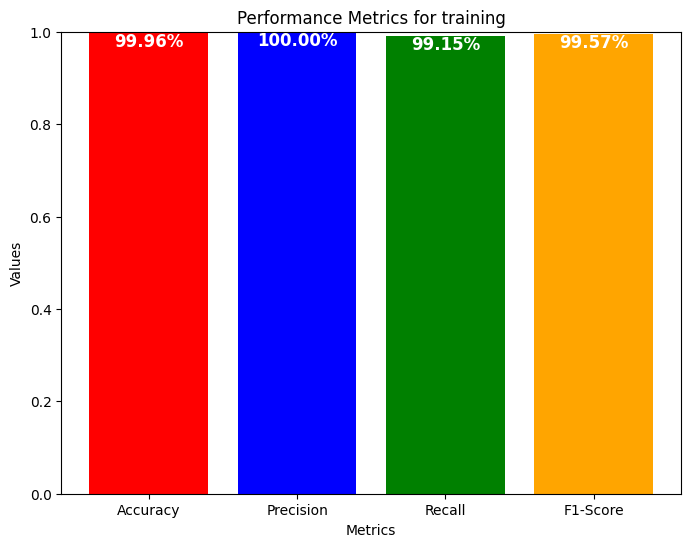

In [142]:
cnn_values = [cnn_train_accuracy, cnn_train_precision,
              cnn_train_recall, train_f1_score_value_cnn]

plt.figure(figsize=(8, 6))
cnn_matrix_bars = plt.bar(metrics, cnn_values, color=['red',
                          'blue', 'green', 'orange'])
for bar in cnn_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.2f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for training')
plt.ylim(0, 1)
plt.show()


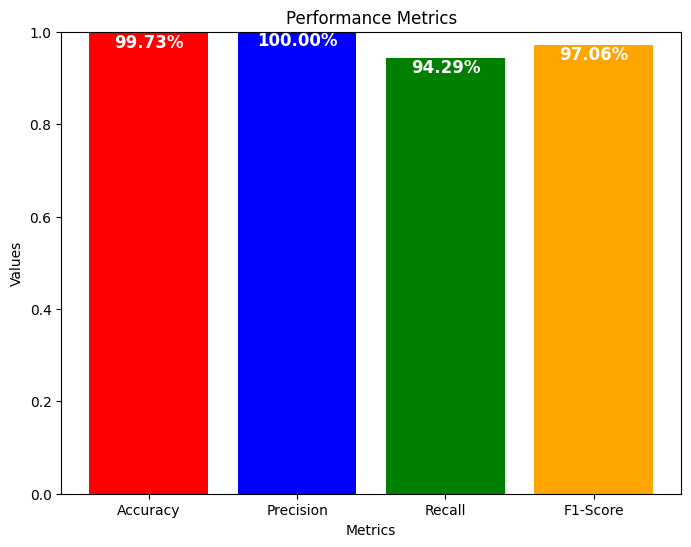

In [143]:
cnn_values = [cnn_accuracy, cnn_precision, cnn_recall, f1_score_value_cnn]

plt.figure(figsize=(8, 6))
cnn_matrix_bars = plt.bar(metrics, cnn_values, color=['red',
                          'blue', 'green', 'orange'])
for bar in cnn_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.2f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics')
plt.ylim(0, 1)
plt.show()


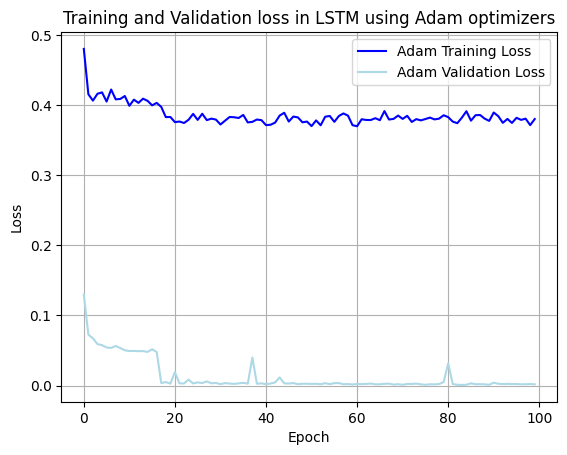

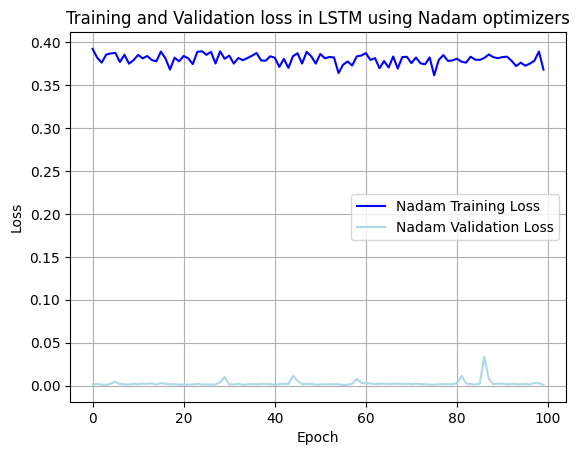

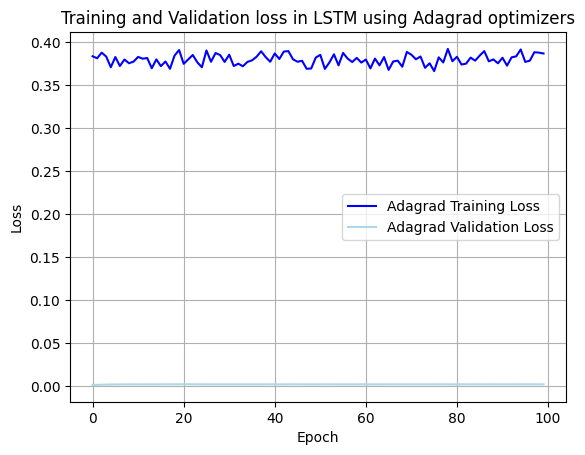

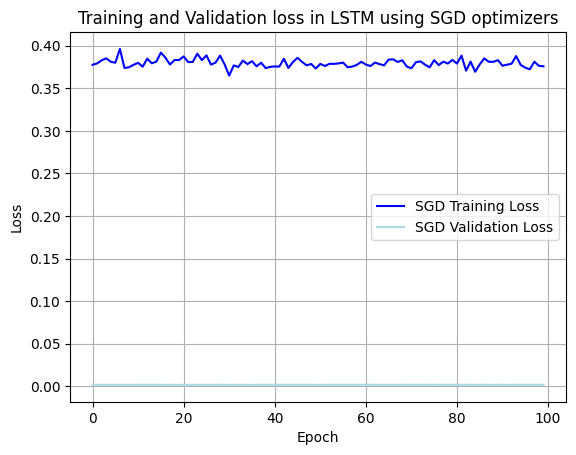

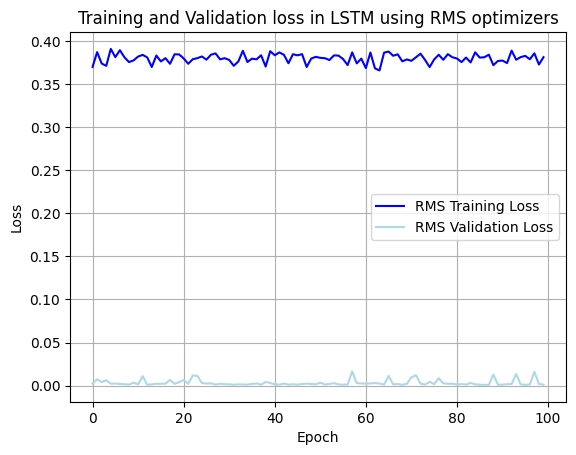

In [144]:
# ----- LSTM Adam Loss -----
plt.plot(lstm_adam_history.history['loss'],
         label="Adam Training Loss", color='blue')
plt.plot(lstm_adam_history.history['val_loss'],
         label="Adam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM Nadam Loss -----
plt.plot(lstm_nadam_history.history['loss'],
         label="Nadam Training Loss", color='blue')
plt.plot(lstm_nadam_history.history['val_loss'],
         label="Nadam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM Adgrad Loss -----
plt.plot(lstm_adagrad_history.history['loss'],
         label="Adagrad Training Loss", color='blue')
plt.plot(lstm_adagrad_history.history['val_loss'],
         label="Adagrad Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM SGD Loss -----
plt.plot(lstm_sgd_history.history['loss'],
         label="SGD Training Loss", color='blue')
plt.plot(lstm_sgd_history.history['val_loss'],
         label="SGD Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM RMSProp Loss -----
plt.plot(lstm_rms_history.history['loss'],
         label="RMS Training Loss", color='blue')
plt.plot(lstm_rms_history.history['val_loss'],
         label="RMS Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


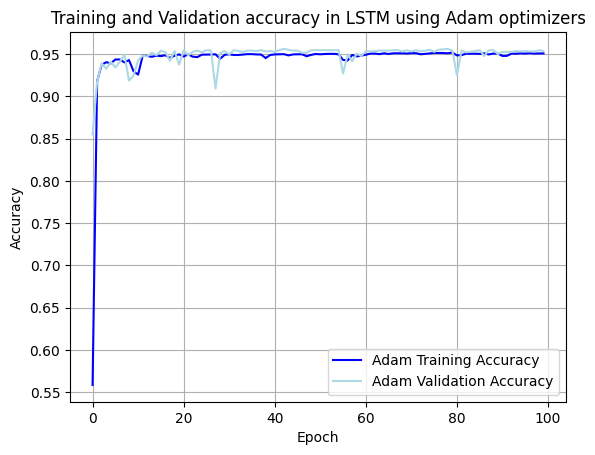

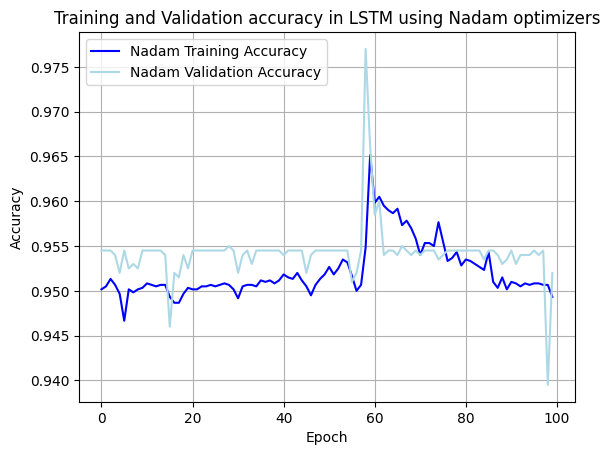

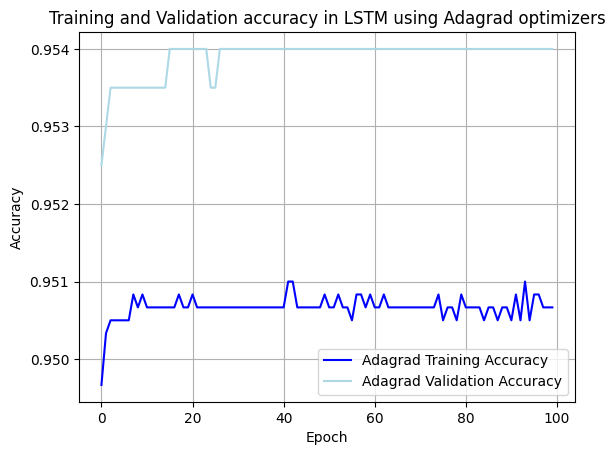

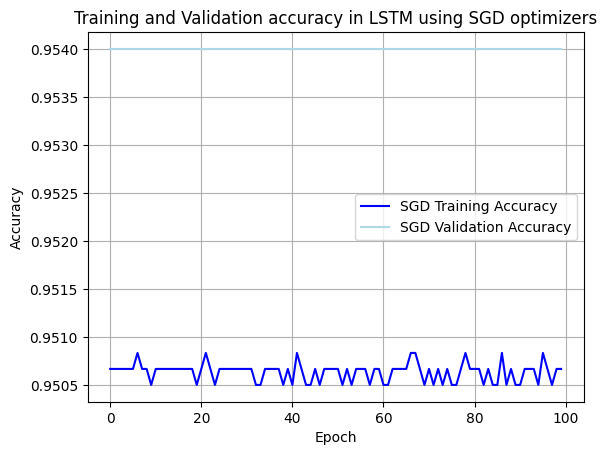

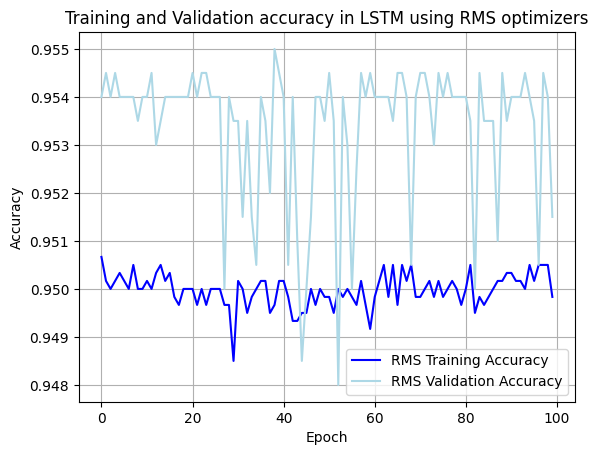

In [145]:
# ----- LSTM Adam Accuracy -----
plt.plot(lstm_adam_history.history['accuracy'],
         label="Adam Training Accuracy", color='blue')
plt.plot(lstm_adam_history.history['val_accuracy'],
         label="Adam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM Nadam Accuracy -----
plt.plot(lstm_nadam_history.history['accuracy'],
         label="Nadam Training Accuracy", color='blue')
plt.plot(lstm_nadam_history.history['val_accuracy'],
         label="Nadam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM Adgrad Accuracy -----
plt.plot(lstm_adagrad_history.history['accuracy'],
         label="Adagrad Training Accuracy", color='blue')
plt.plot(lstm_adagrad_history.history['val_accuracy'],
         label="Adagrad Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM SGD Accuracy -----
plt.plot(lstm_sgd_history.history['accuracy'],
         label="SGD Training Accuracy", color='blue')
plt.plot(lstm_sgd_history.history['val_accuracy'],
         label="SGD Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM RMSProp Accuracy -----
plt.plot(lstm_rms_history.history['accuracy'],
         label="RMS Training Accuracy", color='blue')
plt.plot(lstm_rms_history.history['val_accuracy'],
         label="RMS Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


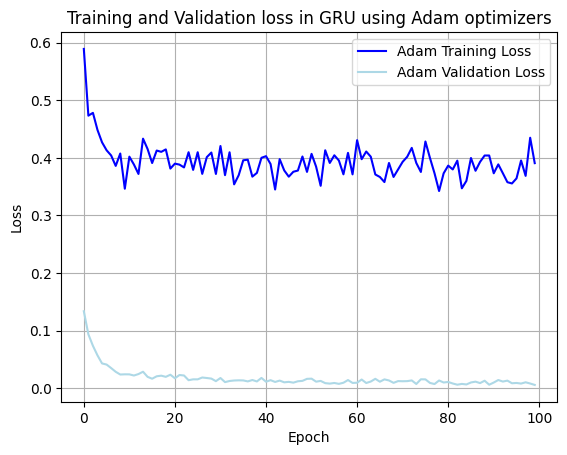

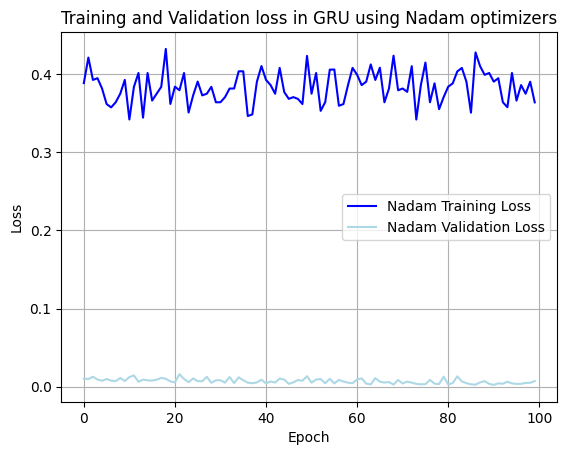

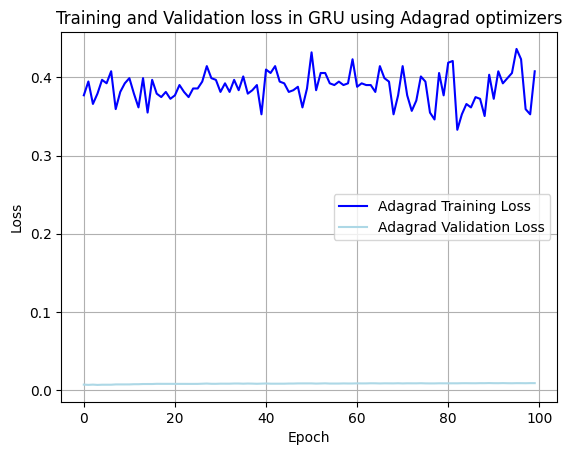

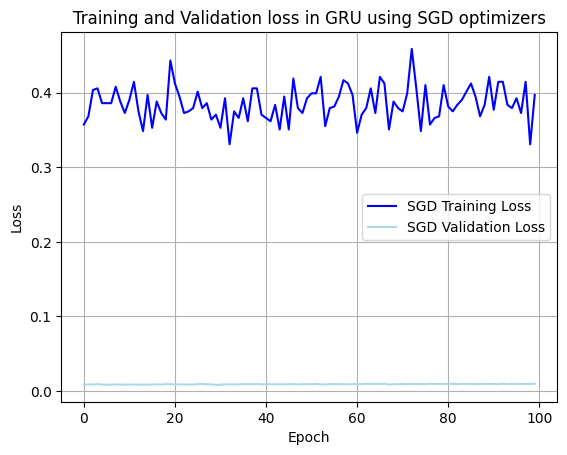

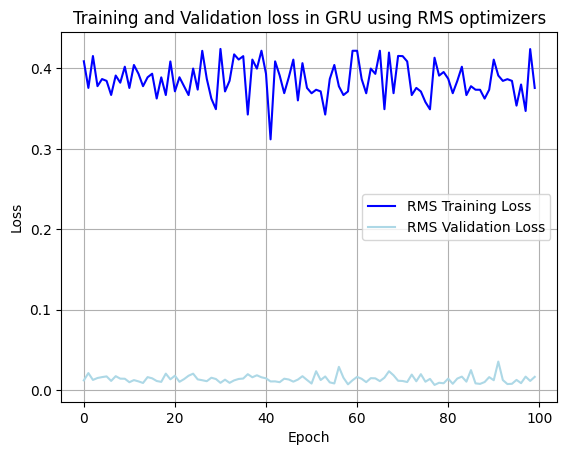

In [146]:
# ----- GRU Adam Loss -----
plt.plot(gru_adam_history.history['loss'],
         label="Adam Training Loss", color='blue')
plt.plot(gru_adam_history.history['val_loss'],
         label="Adam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU Nadam Loss -----
plt.plot(gru_nadam_history.history['loss'],
         label="Nadam Training Loss", color='blue')
plt.plot(gru_nadam_history.history['val_loss'],
         label="Nadam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU Adgrad Loss -----
plt.plot(gru_adagrad_history.history['loss'],
         label="Adagrad Training Loss", color='blue')
plt.plot(gru_adagrad_history.history['val_loss'],
         label="Adagrad Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU SGD Loss -----
plt.plot(gru_sgd_history.history['loss'],
         label="SGD Training Loss", color='blue')
plt.plot(gru_sgd_history.history['val_loss'],
         label="SGD Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU RMSProp Loss -----
plt.plot(gru_rms_history.history['loss'],
         label="RMS Training Loss", color='blue')
plt.plot(gru_rms_history.history['val_loss'],
         label="RMS Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


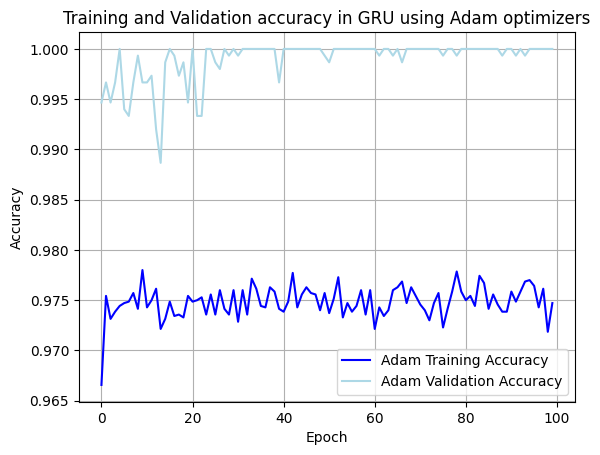

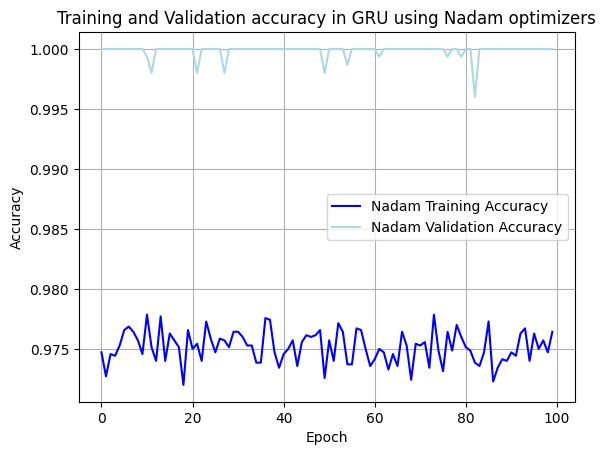

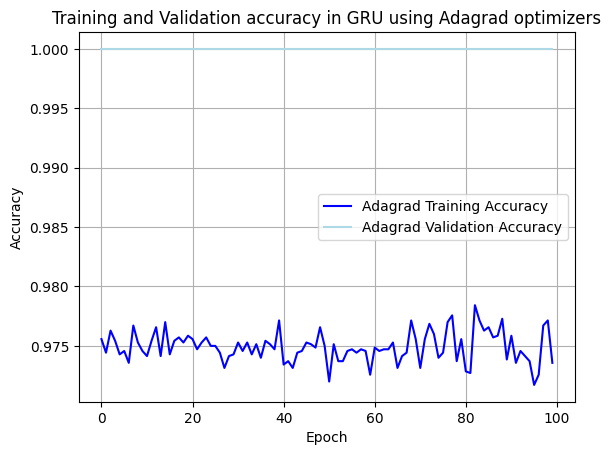

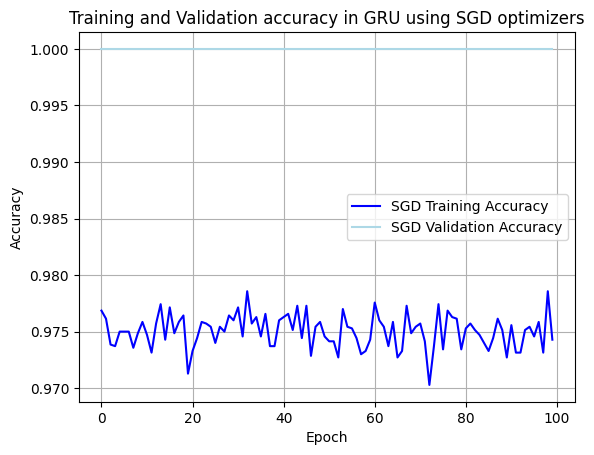

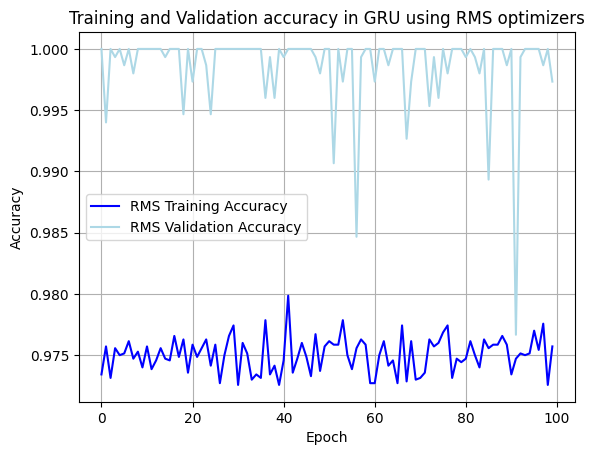

In [147]:
# ----- GRU Adam Accuracy -----
plt.plot(gru_adam_history.history['accuracy'],
         label="Adam Training Accuracy", color='blue')
plt.plot(gru_adam_history.history['val_accuracy'],
         label="Adam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU Nadam Accuracy -----
plt.plot(gru_nadam_history.history['accuracy'],
         label="Nadam Training Accuracy", color='blue')
plt.plot(gru_nadam_history.history['val_accuracy'],
         label="Nadam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU Adgrad Accuracy -----
plt.plot(gru_adagrad_history.history['accuracy'],
         label="Adagrad Training Accuracy", color='blue')
plt.plot(gru_adagrad_history.history['val_accuracy'],
         label="Adagrad Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU SGD Accuracy -----
plt.plot(gru_sgd_history.history['accuracy'],
         label="SGD Training Accuracy", color='blue')
plt.plot(gru_sgd_history.history['val_accuracy'],
         label="SGD Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU RMSProp Accuracy -----
plt.plot(gru_rms_history.history['accuracy'],
         label="RMS Training Accuracy", color='blue')
plt.plot(gru_rms_history.history['val_accuracy'],
         label="RMS Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


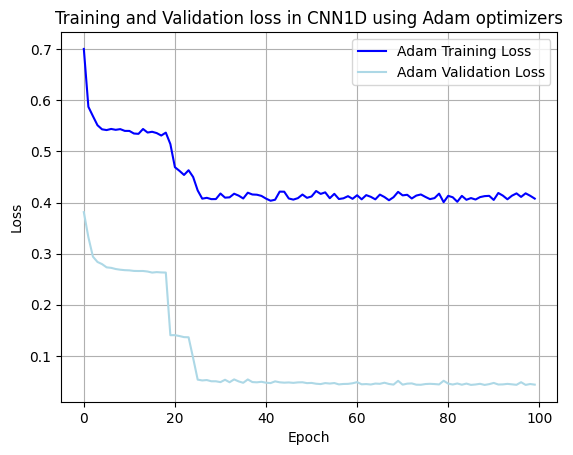

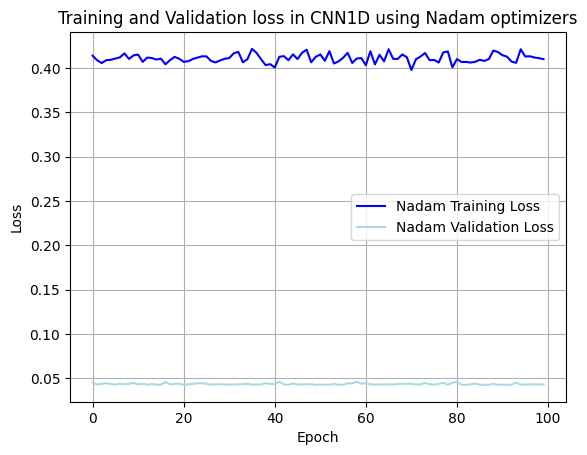

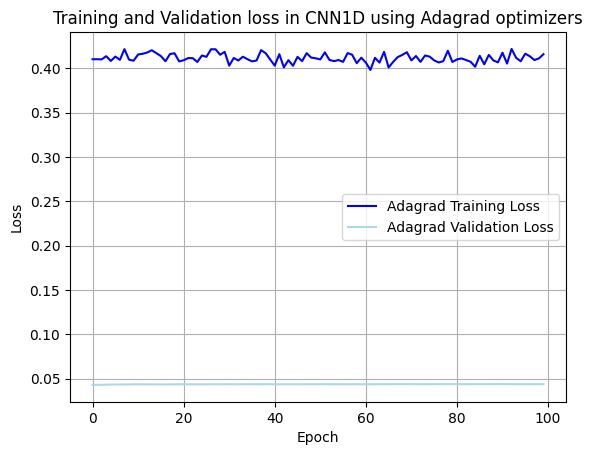

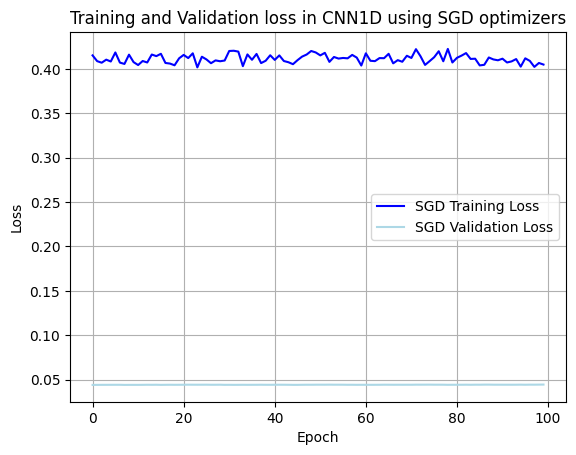

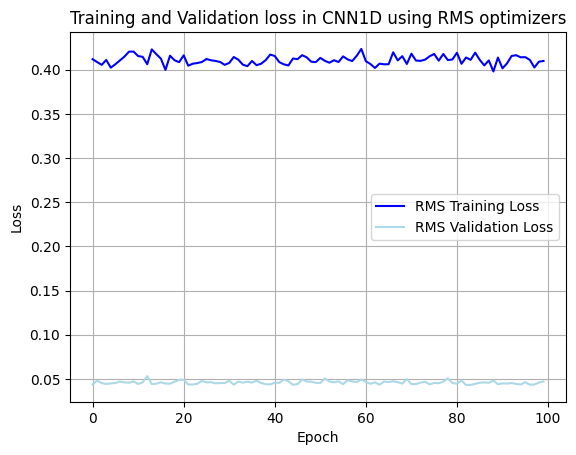

In [148]:
# ----- CNN1D Adam Loss -----
plt.plot(cnn_adam_history.history['loss'],
         label="Adam Training Loss", color='blue')
plt.plot(cnn_adam_history.history['val_loss'],
         label="Adam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1D Nadam Loss -----
plt.plot(cnn_nadam_history.history['loss'],
         label="Nadam Training Loss", color='blue')
plt.plot(cnn_nadam_history.history['val_loss'],
         label="Nadam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1D Adgrad Loss -----
plt.plot(cnn_adagrad_history.history['loss'],
         label="Adagrad Training Loss", color='blue')
plt.plot(cnn_adagrad_history.history['val_loss'],
         label="Adagrad Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1D SGD Loss -----
plt.plot(cnn_sgd_history.history['loss'],
         label="SGD Training Loss", color='blue')
plt.plot(cnn_sgd_history.history['val_loss'],
         label="SGD Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1D RMSProp Loss -----
plt.plot(cnn_rms_history.history['loss'],
         label="RMS Training Loss", color='blue')
plt.plot(cnn_rms_history.history['val_loss'],
         label="RMS Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


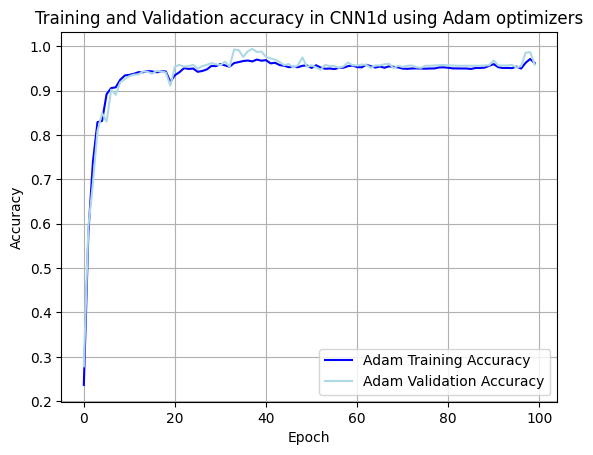

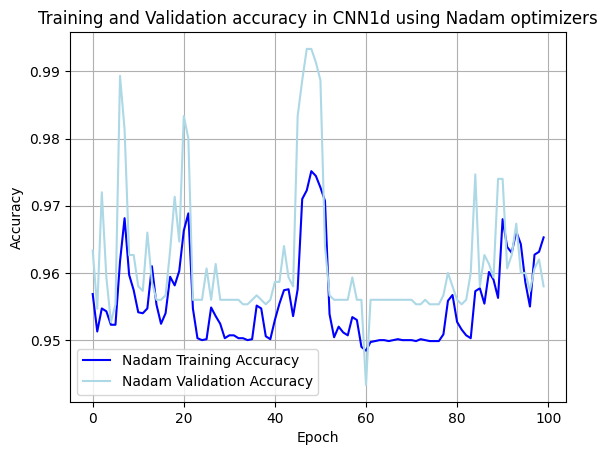

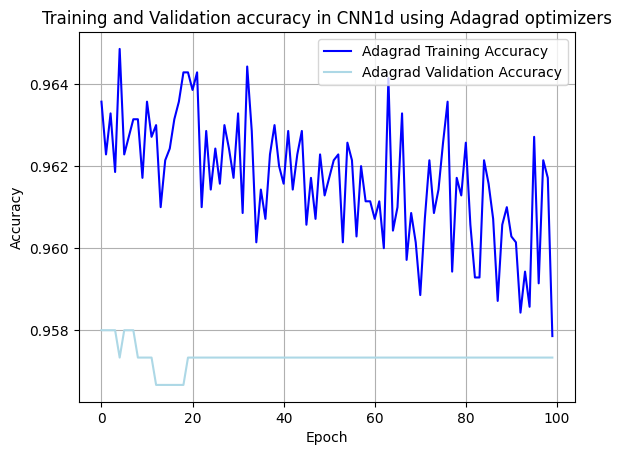

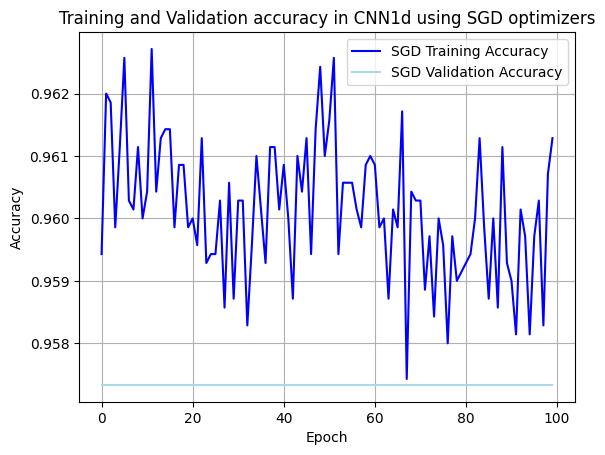

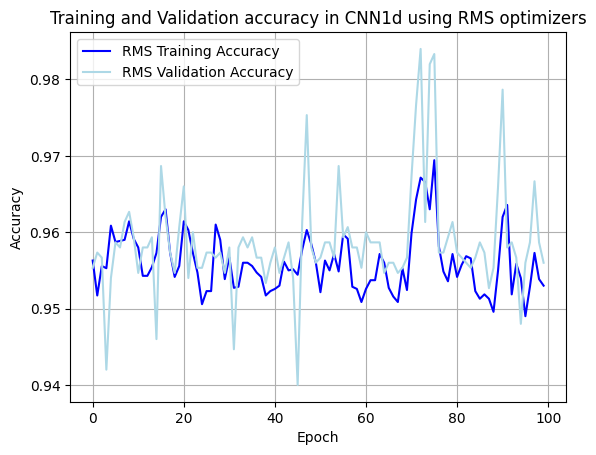

In [149]:
# ----- CNN1d Adam Accuracy -----
plt.plot(cnn_adam_history.history['accuracy'],
         label="Adam Training Accuracy", color='blue')
plt.plot(cnn_adam_history.history['val_accuracy'],
         label="Adam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1d Nadam Accuracy -----
plt.plot(cnn_nadam_history.history['accuracy'],
         label="Nadam Training Accuracy", color='blue')
plt.plot(cnn_nadam_history.history['val_accuracy'],
         label="Nadam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1d Adgrad Accuracy -----
plt.plot(cnn_adagrad_history.history['accuracy'],
         label="Adagrad Training Accuracy", color='blue')
plt.plot(cnn_adagrad_history.history['val_accuracy'],
         label="Adagrad Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1d SGD Accuracy -----
plt.plot(cnn_sgd_history.history['accuracy'],
         label="SGD Training Accuracy", color='blue')
plt.plot(cnn_sgd_history.history['val_accuracy'],
         label="SGD Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1d RMSProp Accuracy -----
plt.plot(cnn_rms_history.history['accuracy'],
         label="RMS Training Accuracy", color='blue')
plt.plot(cnn_rms_history.history['val_accuracy'],
         label="RMS Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [150]:
# plt.figure(figsize=(12, 6))

# cnn_adam_h = np.mean(cnn_adam_history.history['loss'])
# cnn_nadam_h = np.mean(cnn_nadam_history.history['loss'])
# cnn_adagrad_h = np.mean(cnn_adagrad_history.history['loss'])
# cnn_sgd_h = np.mean(cnn_sgd_history.history['loss'])
# cnn_rms_h = np.mean(cnn_rms_history.history['loss'])

# cnn_adam_h_v = np.mean(cnn_adam_history.history['val_loss'])
# cnn_nadam_h_v = np.mean(cnn_nadam_history.history['val_loss'])
# cnn_adagrad_h_v = np.mean(cnn_adagrad_history.history['val_loss'])
# cnn_sgd_h_v = np.mean(cnn_sgd_history.history['val_loss'])
# cnn_rms_h_v = np.mean(cnn_rms_history.history['val_loss'])

# cnn_optimizers = [cnn_adam_h, cnn_nadam_h,
#                   cnn_adagrad_h, cnn_sgd_h, cnn_rms_h]
# cnn_optimizers_v = [cnn_adam_h_v, cnn_nadam_h_v,
#                     cnn_adagrad_h_v, cnn_sgd_h_v, cnn_rms_h_v]

# plt.plot(cnn_optimizers, label="Loss", color='blue')
# plt.plot(cnn_optimizers_v, label="Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in CNN1D")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()


In [151]:
# plt.figure(figsize=(12, 6))

# cnn_adam_acc = np.mean(cnn_adam_history.history['accuracy'])
# cnn_nadam_acc = np.mean(cnn_nadam_history.history['accuracy'])
# cnn_adagrad_acc = np.mean(cnn_adagrad_history.history['accuracy'])
# cnn_sgd_acc = np.mean(cnn_sgd_history.history['accuracy'])
# cnn_rms_acc = np.mean(cnn_rms_history.history['accuracy'])

# cnn_adam_val_acc = np.mean(cnn_adam_history.history['val_accuracy'])
# cnn_nadam_val_acc = np.mean(cnn_nadam_history.history['val_accuracy'])
# cnn_adagrad_val_acc = np.mean(cnn_adagrad_history.history['val_accuracy'])
# cnn_sgd_val_acc = np.mean(cnn_sgd_history.history['val_accuracy'])
# cnn_rms_val_acc = np.mean(cnn_rms_history.history['val_accuracy'])


# cnn_optimizers_acc = [cnn_adam_acc, cnn_nadam_acc,
#                       cnn_adagrad_acc, cnn_sgd_acc, cnn_rms_acc]
# cnn_optimizers_val_acc = [cnn_adam_val_acc, cnn_nadam_val_acc,
#                           cnn_adagrad_val_acc, cnn_sgd_val_acc, cnn_rms_val_acc]

# plt.plot(cnn_optimizers_acc, label="Accuracy", color='blue')
# plt.plot(cnn_optimizers_val_acc, label="Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in CNN1D")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()


In [152]:
models = ['LSTM', 'GRU', '1D-CNN']


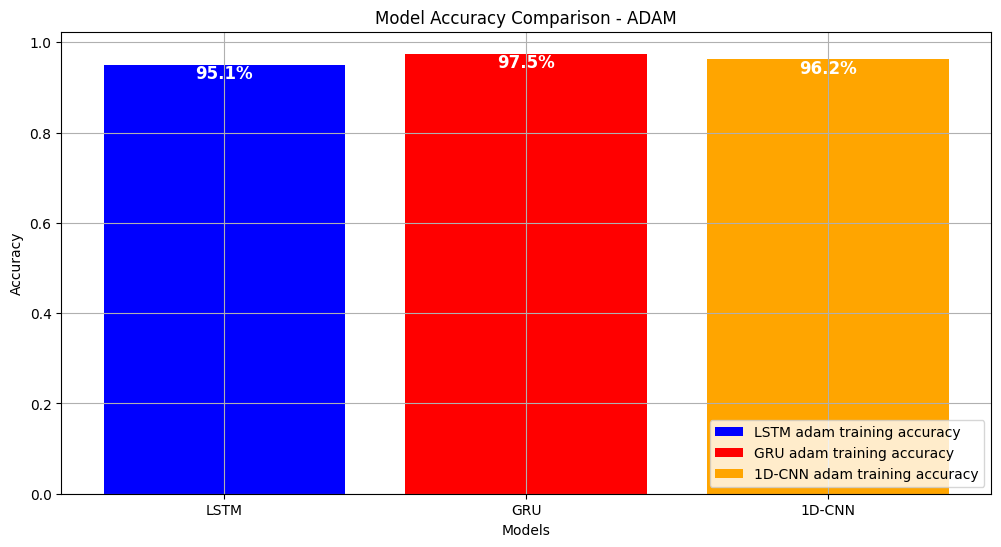

In [153]:
plt.figure(figsize=(12, 6))

# lstm_adam_train_acc = np.mean(lstm_adam_history.history["accuracy"])
# lstm_adam_val_acc = np.mean(lstm_adam_history.history["val_accuracy"])

# gru_adam_train_acc = np.mean(gru_adam_history.history["accuracy"])
# gru_adam_val_acc = np.mean(gru_adam_history.history["val_accuracy"])

# cnn_adam_train_acc = np.mean(cnn_adam_history.history["accuracy"])
# cnn_adam_val_acc = np.mean(cnn_adam_history.history["val_accuracy"])

adam_histories = [lstm_adam_history, gru_adam_history, cnn_adam_history]

# adam_accuracies = [lstm_adam_train_acc, gru_adam_train_acc, cnn_adam_train_acc]

adam_accuracies = [a_history.history['accuracy'][-1]
                   for a_history in adam_histories]

adam_bar = plt.bar(models, adam_accuracies, label=['LSTM adam training accuracy',
                                                   'GRU adam training accuracy', '1D-CNN adam training accuracy'], color=['blue', 'red', 'orange'])

for bar in adam_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.title("Model Accuracy Comparison - ADAM")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


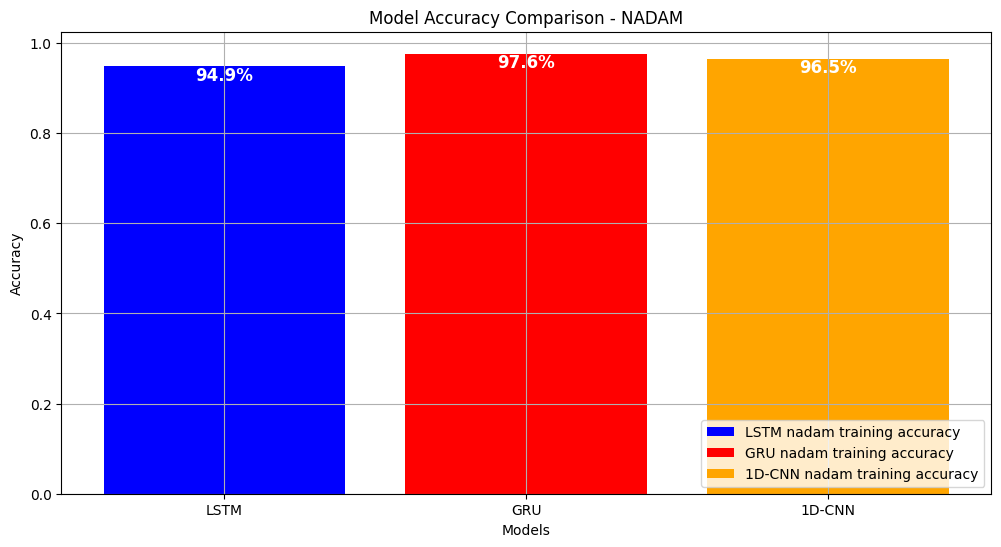

In [154]:
plt.figure(figsize=(12, 6))

# lstm_nadam_train_acc = np.mean(lstm_nadam_history.history["accuracy"])
# lstm_nadam_val_acc = lstm_nadam_history.history["val_accuracy"]

# gru_nadam_train_acc = np.mean(gru_nadam_history.history["accuracy"])
# gru_nadam_val_acc = gru_nadam_history.history["val_accuracy"]

# cnn_nadam_train_acc = np.mean(cnn_nadam_history.history["accuracy"])
# cnn_nadam_val_acc = cnn_nadam_history.history["val_accuracy"]

# nadam_accuracies = [lstm_nadam_train_acc,
#                     gru_nadam_train_acc, cnn_nadam_train_acc]

nadam_histories = [lstm_nadam_history, gru_nadam_history, cnn_nadam_history]

nadam_accuracies = [n_history.history['accuracy'][-1]
                    for n_history in nadam_histories]

nadam_bar = plt.bar(models, nadam_accuracies, label=['LSTM nadam training accuracy',
                                                     'GRU nadam training accuracy', '1D-CNN nadam training accuracy'], color=['blue', 'red', 'orange'])

for bar in nadam_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.title('Model Accuracy Comparison - NADAM')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


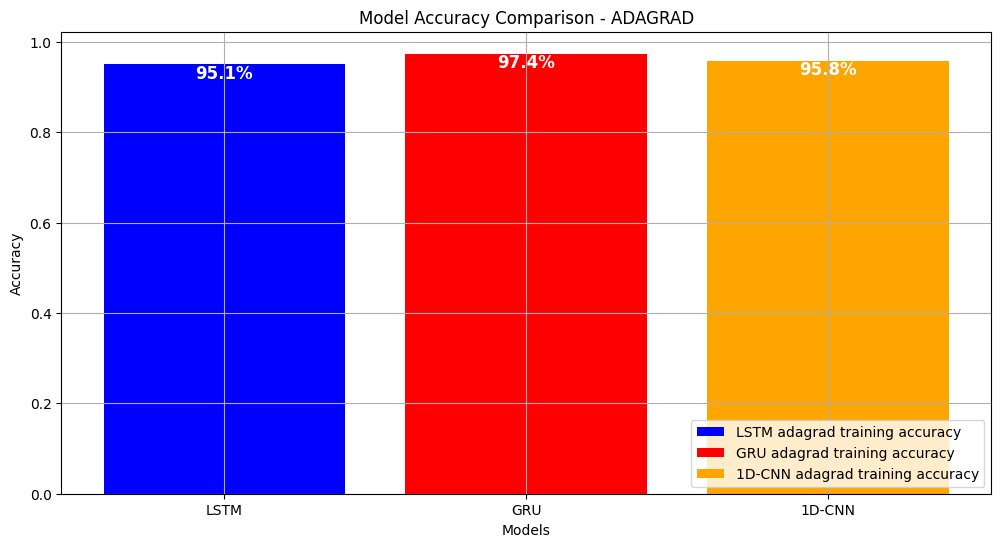

In [155]:
plt.figure(figsize=(12, 6))

# lstm_adagrad_train_acc = np.mean(lstm_adagrad_history.history['accuracy'])
# lstm_adagrad_val_acc = lstm_adagrad_history.history['val_accuracy']

# gru_adagrad_train_acc = np.mean(gru_adagrad_history.history['accuracy'])
# gru_adagrad_val_acc = gru_adagrad_history.history['val_accuracy']

# cnn_adagrad_train_acc = np.mean(cnn_adagrad_history.history['accuracy'])
# cnn_adagrad_val_acc = cnn_adagrad_history.history['val_accuracy']

# adagrad_accuracies = [lstm_adagrad_train_acc,
#                       gru_adagrad_train_acc, cnn_adagrad_train_acc]

adagrad_histories = [lstm_adagrad_history,
                     gru_adagrad_history, cnn_adagrad_history]

adagrad_accuracies = [ad_history.history['accuracy'][-1]
                      for ad_history in adagrad_histories]

adagrad_bar = plt.bar(models, adagrad_accuracies,  label=['LSTM adagrad training accuracy',
                                                          'GRU adagrad training accuracy', '1D-CNN adagrad training accuracy'], color=['blue', 'red',  'orange'])

for bar in adagrad_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.title('Model Accuracy Comparison - ADAGRAD')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


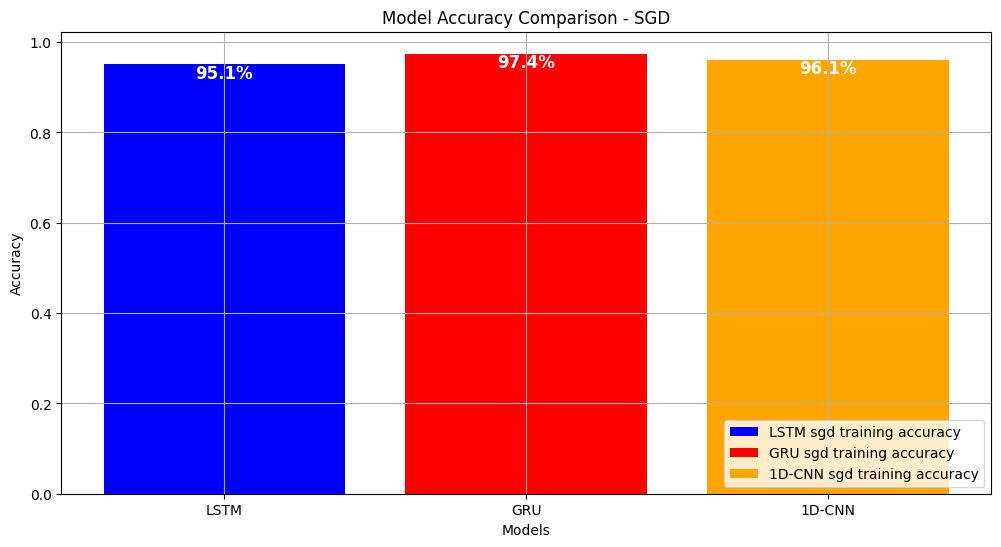

In [156]:
plt.figure(figsize=(12, 6))

# lstm_sgd_train_acc = np.mean(lstm_sgd_history.history['accuracy'])

# gru_sgd_train_acc = np.mean(gru_sgd_history.history['accuracy'])

# cnn_sgd_train_acc = np.mean(cnn_sgd_history.history['accuracy'])

# sgd_accuracies = [lstm_sgd_train_acc,
#                   gru_sgd_train_acc, cnn_sgd_train_acc]

sgd_histories = [lstm_sgd_history, gru_sgd_history, cnn_sgd_history]

sgd_accuracies = [sgd_history.history['accuracy'][-1]
                  for sgd_history in sgd_histories]

sgd_bar = plt.bar(models, sgd_accuracies,  label=['LSTM sgd training accuracy',
                                                  'GRU sgd training accuracy', '1D-CNN sgd training accuracy'], color=['blue', 'red',  'orange'])

for bar in sgd_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.title('Model Accuracy Comparison - SGD')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


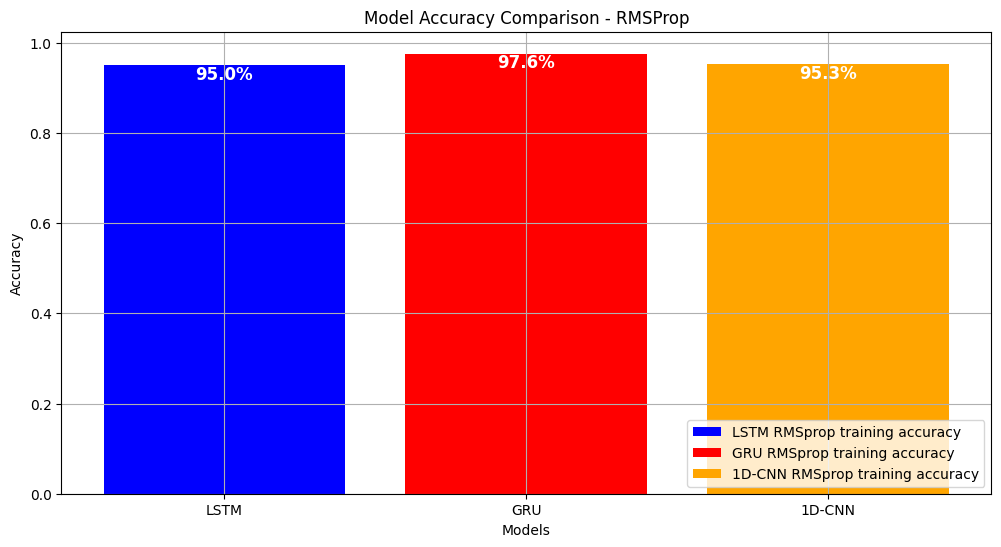

In [157]:
plt.figure(figsize=(12, 6))

# lstm_rms_train_acc = np.mean(lstm_rms_history.history['accuracy'])
# gru_rms_train_acc = np.mean(gru_rms_history.history['accuracy'])
# cnn_rms_train_acc = np.mean(cnn_rms_history.history['accuracy'])

# rms_accuracies = [lstm_rms_train_acc, gru_rms_train_acc, cnn_rms_train_acc]

rms_histories = [lstm_rms_history, gru_rms_history, cnn_rms_history]

rms_accuracies = [rms_history.history['accuracy'][-1]
                  for rms_history in rms_histories]

rms_bar = plt.bar(models, rms_accuracies, label=['LSTM RMSprop training accuracy',
                                                 'GRU RMSprop training accuracy', '1D-CNN RMSprop training accuracy'], color=['blue', 'red',  'orange'])

for bar in rms_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.title('Model Accuracy Comparison - RMSProp')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


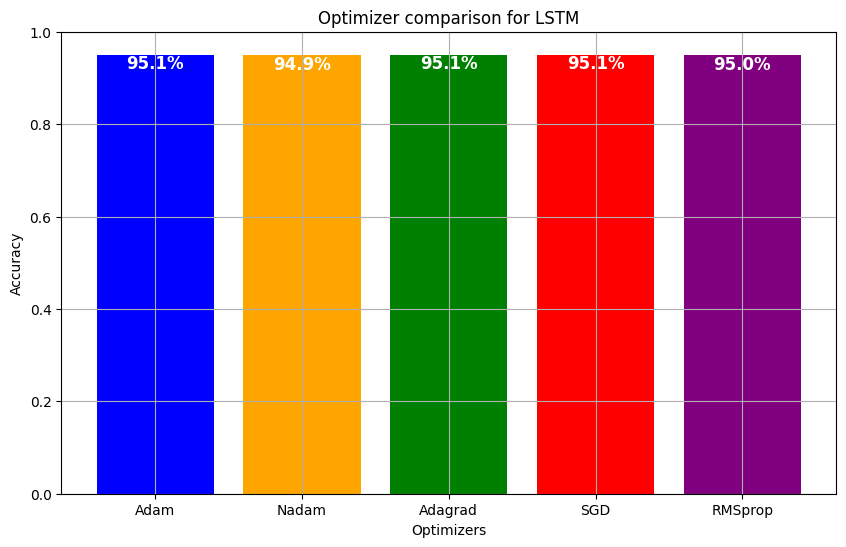

In [158]:
optimizers = ['Adam', 'Nadam', 'Adagrad', 'SGD', 'RMSprop']
lstm_histories = [lstm_adam_history, lstm_nadam_history,
                  lstm_adagrad_history, lstm_sgd_history, lstm_rms_history]

plt.figure(figsize=(10, 6))

lstm_accuracies = [history.history['accuracy'][-1]
                   for history in lstm_histories]

lstm_bars = plt.bar(optimizers, lstm_accuracies, color=[
    'blue', 'orange', 'green', 'red', 'purple'])
plt.title("Optimizer comparison for LSTM")
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)

for bar in lstm_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.show()


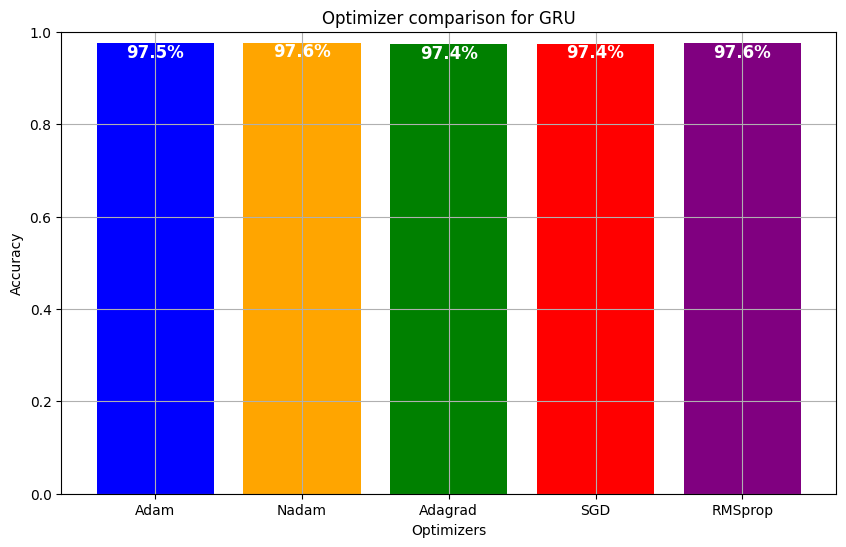

In [159]:
optimizers = ['Adam', 'Nadam', 'Adagrad', 'SGD', 'RMSprop']
gru_histories = [gru_adam_history, gru_nadam_history,
                 gru_adagrad_history, gru_sgd_history, gru_rms_history]

plt.figure(figsize=(10, 6))

gru_accuracies = [history.history['accuracy'][-1] for history in gru_histories]

gru_bars = plt.bar(optimizers, gru_accuracies, color=[
    'blue', 'orange', 'green', 'red', 'purple'])
plt.title("Optimizer comparison for GRU")
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)

for bar in gru_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.show()


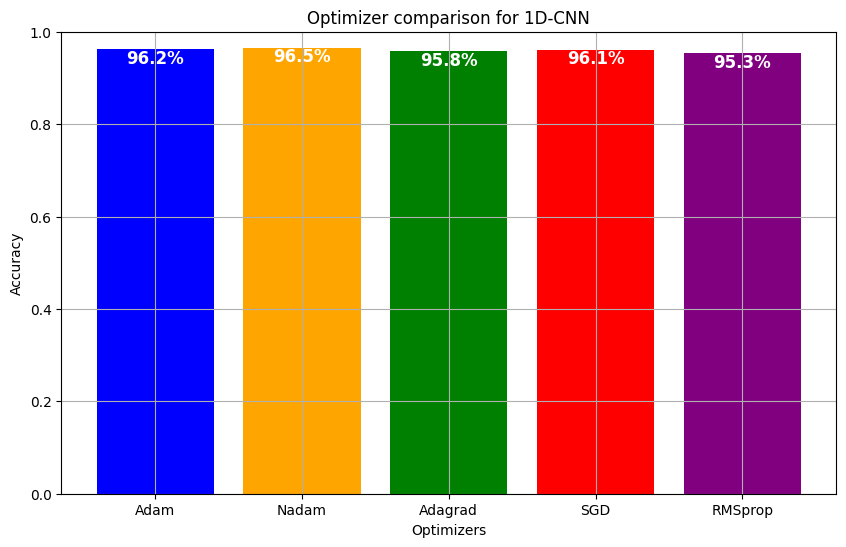

In [160]:
optimizers = ['Adam', 'Nadam', 'Adagrad', 'SGD', 'RMSprop']
cnn_histories = [cnn_adam_history, cnn_nadam_history,
                 cnn_adagrad_history, cnn_sgd_history, cnn_rms_history]

plt.figure(figsize=(10, 6))

cnn_accuracies = [history.history['accuracy'][-1] for history in cnn_histories]

cnn_bars = plt.bar(optimizers, cnn_accuracies, color=[
    'blue', 'orange', 'green', 'red', 'purple'])
plt.title("Optimizer comparison for 1D-CNN")
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)

for bar in cnn_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.show()
